In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Download the Mall Customer Segmentation Dataset from the new URL
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"

# Load the dataset
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Select relevant features for hierarchical clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
X = features_scaled

### Hierarchical Clustering - Linkage method -FInding optimum clusters

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
#ward: sum of squared differences within all clusters before and after merging
Z = linkage(X,  method='ward')
#Z = linkage(X, method='single')
#Z = linkage(X, method='complete')
#Z = linkage(X, method='average')
#Z = linkage(X, method='centroid')
#Z = linkage(X, method='median')


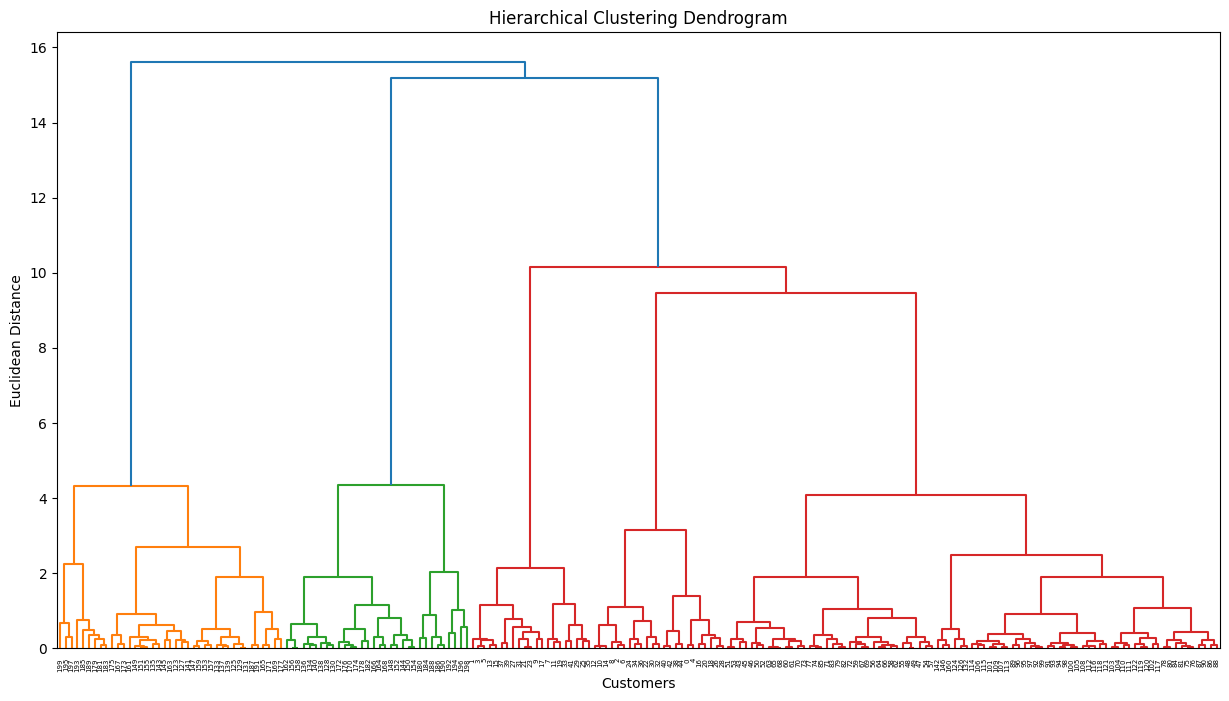

In [ ]:

# Visualize the hierarchical clustering using a dendrogram
plt.figure(figsize=(15, 8))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster
# Determine the optimal number of clusters by cutting the dendrogram
# Choose a threshold, e.g., the largest vertical distance (based on visual inspection)
max_d = 9  # You can adjust this threshold based on the dendrogram
clusters = fcluster(Z, max_d, criterion='distance')

print("Number of clusters:", len(set(clusters)))

Number of clusters: 5


###Agglomerative Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
y_hc=hc.fit_predict(X)

In [ ]:
data["Cluster"] = y_hc
data


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [ ]:
# prompt: get count in data['Cluster']

data['Cluster'].value_counts()

Cluster
2    85
1    39
0    32
4    23
3    21
Name: count, dtype: int64

In [ ]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

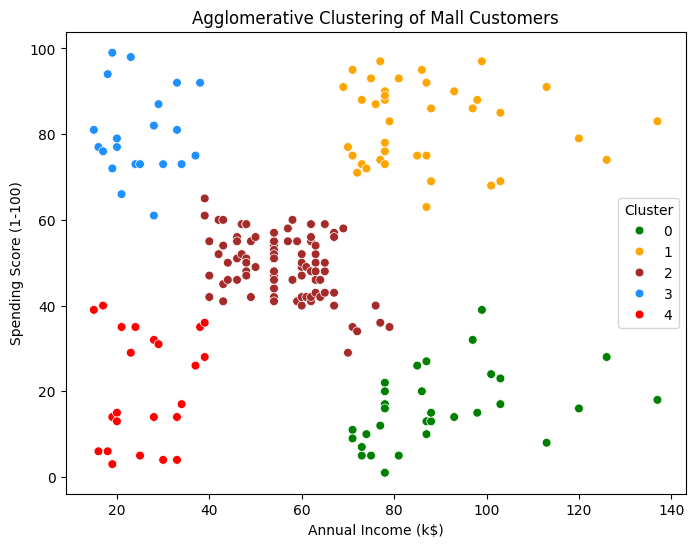

In [ ]:
import seaborn as sns
#Scatterplot of the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)', hue="Cluster",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = data  ,s = 40 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering of Mall Customers')
plt.show()

In [ ]:
#Customer Segmentation
#Green => High Income, Low Spending : Carefull Custmers
#Yellow => High Income, High Spending : Target Customer
#Brown => Normal Income, Normal Spending:  Standard Customer
#Red => Low Income, Low Spending: Sensible Customers
#Blue => Low Income, High Spending: Careless Cutomers